In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(seed=42)
print(rng)

Generator(PCG64)


In [3]:
rng.integers(low=1, high=10)

np.int64(1)

In [4]:
rng.integers(low=1, high=10, size=10)

array([7, 6, 4, 4, 8, 1, 7, 2, 1, 5])

In [5]:
rng.integers(low=1, high=10, size=(3, 15))

array([[9, 7, 7, 7, 8, 5, 2, 8, 5, 5, 4, 2, 9, 8, 6],
       [4, 8, 5, 4, 5, 3, 1, 5, 8, 1, 8, 8, 3, 6, 2],
       [7, 7, 4, 1, 9, 5, 9, 7, 8, 7, 2, 4, 5, 5, 1]])

In [6]:
x = rng.normal(loc=150, scale=10, size=500)

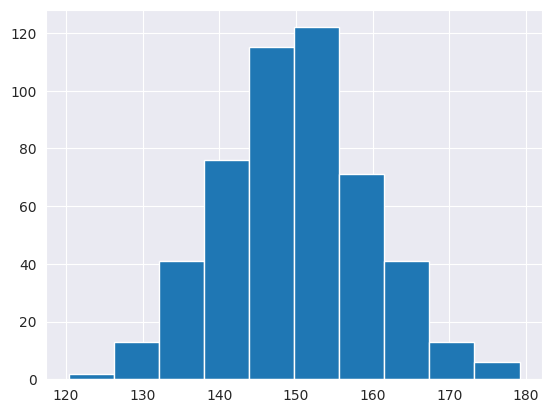

In [7]:
plt.hist(x)
plt.show()

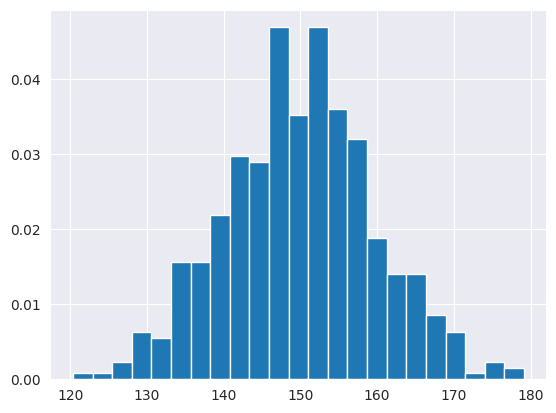

In [8]:
plt.hist(x, bins='sqrt', density=True)
plt.show()

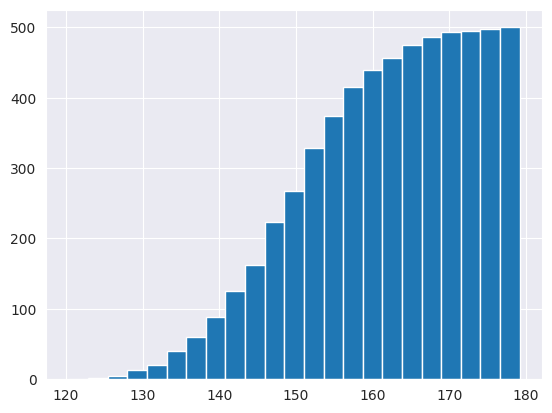

In [9]:
plt.hist(x, bins='sqrt', cumulative=True)
plt.show()

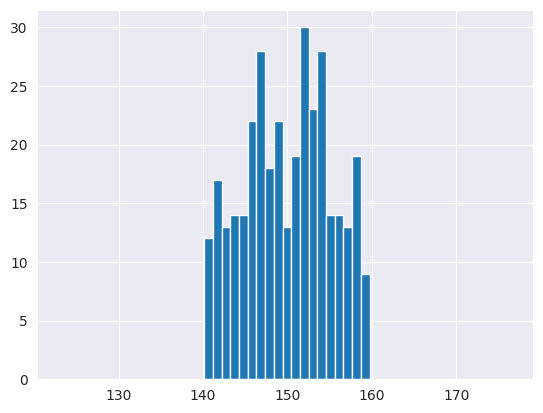

In [10]:
plt.hist(x, bins='sqrt', range=(x.mean() -x.std(), x.mean() + x.std()))
plt.xlim(x.min(), x.max())
plt.show()

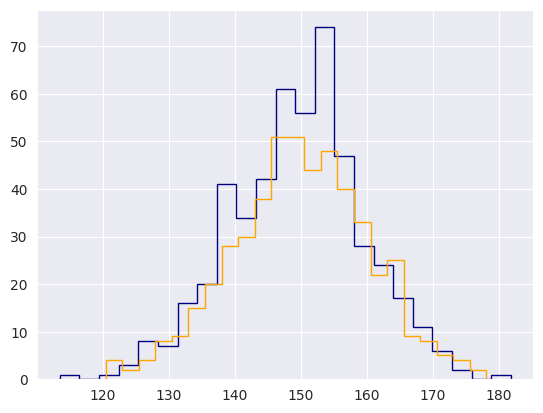

In [11]:
y = rng.normal(loc=150, scale=10, size=(2, 500))

plt.hist(y[0], bins='sqrt', histtype='step', color='navy')
plt.hist(y[1], bins='sqrt', histtype='step', color='orange')

plt.show()

In [12]:
z = rng.exponential(scale=1, size=500)

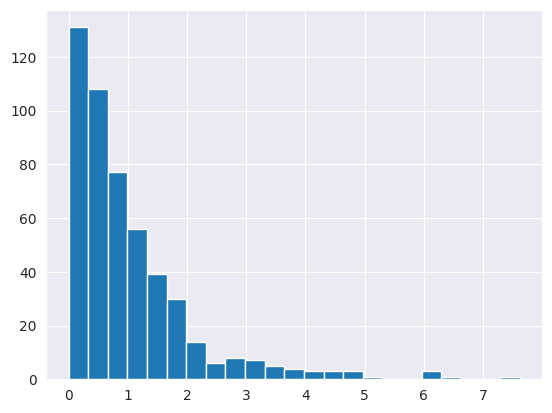

In [13]:
plt.hist(z, bins='sqrt')
plt.show()

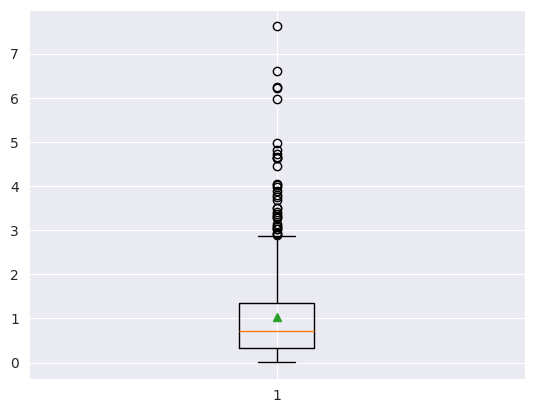

In [14]:
plt.boxplot(z, showmeans=True)
plt.show()

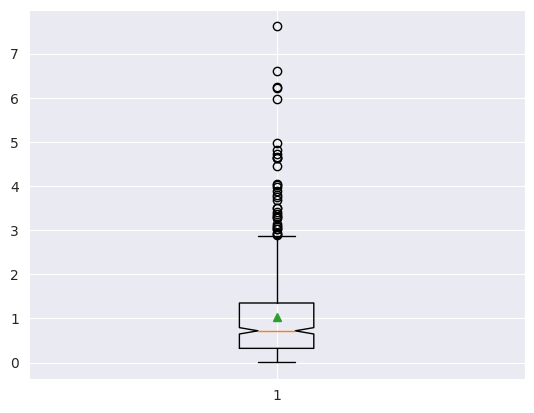

In [15]:
plt.boxplot(z, showmeans=True, notch=True)
plt.show()

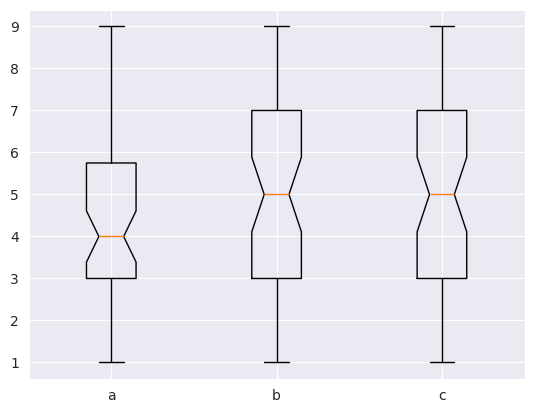

In [16]:
x3 = rng.integers(low=1, high=10, size=(50, 3))
labs = list('abc')

plt.boxplot(x3, tick_labels=labs, notch=True)
plt.show()

In [17]:
np.reshape(x3, (3, 50))

array([[5, 2, 5, 7, 4, 3, 5, 4, 4, 4, 3, 7, 5, 5, 6, 4, 1, 8, 1, 6, 3, 2,
        1, 9, 4, 4, 7, 1, 6, 5, 5, 2, 9, 3, 7, 7, 4, 2, 3, 8, 9, 9, 3, 6,
        2, 7, 4, 7, 7, 9],
       [5, 4, 5, 2, 2, 5, 8, 5, 8, 2, 5, 6, 4, 1, 1, 9, 6, 3, 3, 1, 9, 1,
        7, 3, 4, 3, 8, 1, 4, 3, 3, 2, 9, 4, 4, 4, 9, 4, 4, 3, 3, 1, 6, 1,
        3, 2, 3, 7, 6, 9],
       [4, 9, 1, 5, 8, 5, 9, 3, 1, 7, 1, 7, 7, 8, 5, 9, 2, 4, 2, 7, 7, 8,
        7, 3, 1, 9, 5, 1, 9, 9, 5, 7, 1, 1, 3, 6, 2, 1, 7, 7, 7, 8, 8, 6,
        5, 8, 4, 1, 7, 3]])

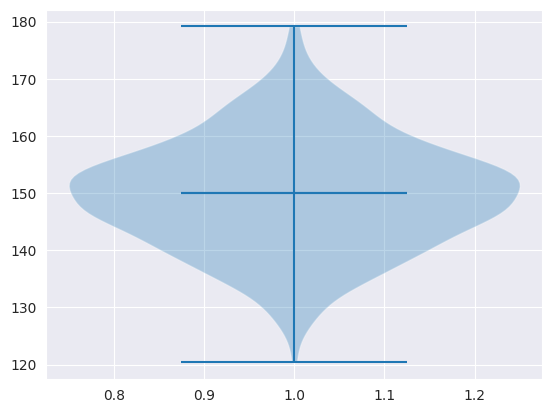

In [18]:
plt.violinplot(x, showmeans=True, showmedians=True)
plt.show()

In [19]:
m1 = rng.normal(loc=150, scale=10, size=500)
m2 = rng.normal(loc=230, scale=5, size=500)

In [20]:
mX = np.concatenate([m1, m2])

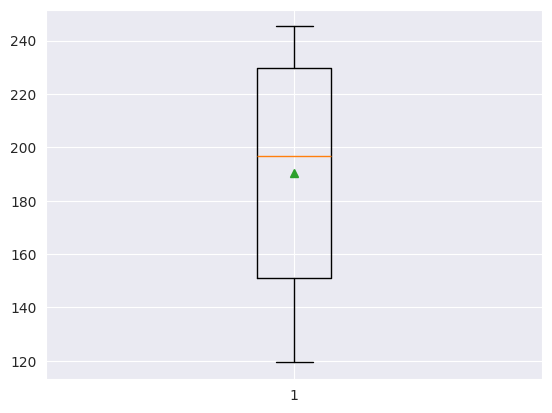

In [21]:
plt.boxplot(mX, showmeans=True)
plt.show()

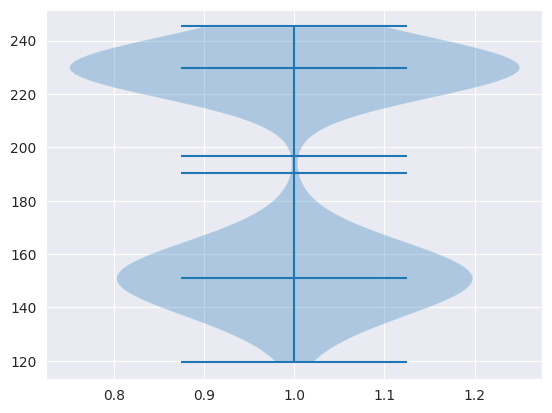

In [22]:
plt.violinplot(mX, showmeans=True, showmedians=True, quantiles=[0.25, 0.75])
plt.show()

In [23]:
import seaborn as sns

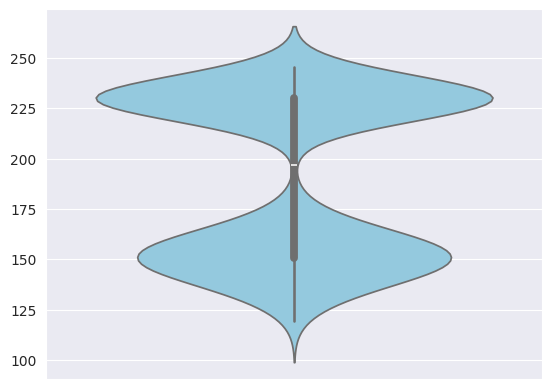

In [24]:
sns.violinplot(mX, orient='v', color='skyblue')
plt.show()

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

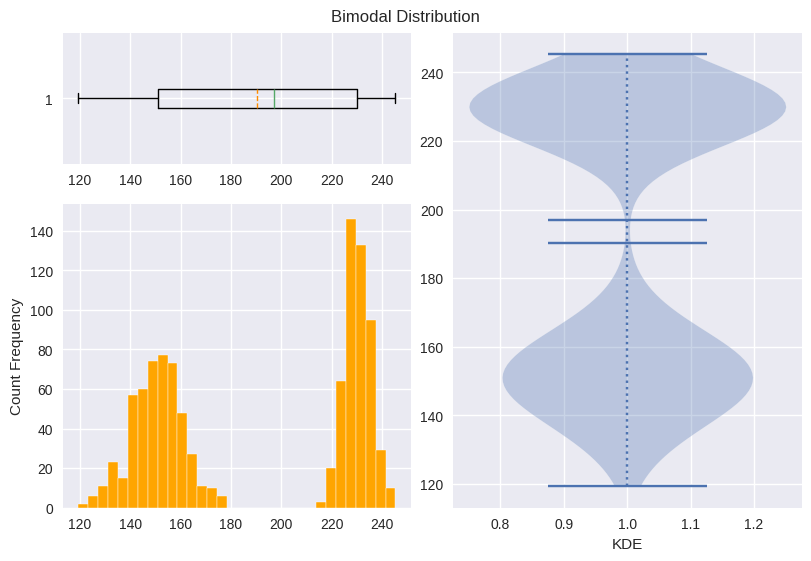

In [33]:
fig = plt.figure(constrained_layout=True)
plt.style.use('seaborn-v0_8')

ax_dict = fig.subplot_mosaic([
    ['boxplot', 'violin'],
    ['histogram', 'violin'],
    ['histogram', 'violin'],
])


mean_props=dict(color='darkorange', linestyle='dashed')

ax_dict['boxplot'].boxplot(mX, showmeans=True, meanline=True, meanprops=mean_props, vert=False)
ax_dict['violin'].violinplot(mX, showmeans=True, showmedians=True)['cbars'].set_linestyle('dotted')
ax_dict['histogram'].hist(mX, bins='sqrt', color='orange')

ax_dict['violin'].set_xlabel('KDE')
ax_dict['histogram'].set_ylabel('Count Frequency')

fig.suptitle('Bimodal Distribution')

fig.savefig('assets/bimodal_dist.png')
plt.show()




In [27]:
def dist_visualisation(data, title="", show=True):
    fig = plt.figure(constrained_layout=True)
    plt.style.use('seaborn-v0_8')
    
    
    ax_dict = fig.subplot_mosaic([
        ['boxplot', 'violin'],
        ['histogram', 'violin'],
        ['histogram', 'violin'],
    ])
    
    mean_props=dict(color="darkorange", linestyle="dashed")
    
    ax_dict['boxplot'].boxplot(data, showmeans=True, meanline=True, meanprops=mean_props, vert=False)
    ax_dict['violin'].violinplot(data, showmeans=True, showmedians=True)["cbars"].set_linestyle('dotted')
    ax_dict['histogram'].hist(data, bins='sqrt', color='orange')
    
    
    ax_dict['violin'].set_xlabel('KDE')
    ax_dict['histogram'].set_ylabel('Count Frequency')
    
    fig.suptitle(title)


    if show:
        plt.show()
    else:
        return fig, ax_dict

    

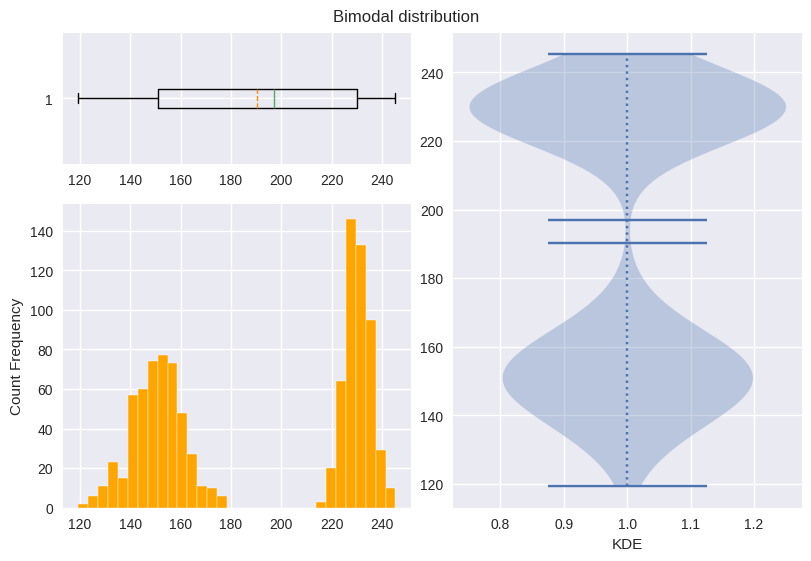

In [32]:
dist_visualisation(mX, 'Bimodal distribution')